<h1 align="center">Test A/B de Thèmes pour une Application Web avec Python</h1>

In [8]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("website_ab_test.csv")
print(data.head())

         Theme  Click Through Rate  Conversion Rate  Bounce Rate  \
0  Light Theme            0.054920         0.282367     0.405085   
1  Light Theme            0.113932         0.032973     0.732759   
2   Dark Theme            0.323352         0.178763     0.296543   
3  Light Theme            0.485836         0.325225     0.245001   
4  Light Theme            0.034783         0.196766     0.765100   

   Scroll_Depth  Age   Location  Session_Duration Purchases Added_to_Cart  
0     72.489458   25    Chennai              1535        No           Yes  
1     61.858568   19       Pune               303        No           Yes  
2     45.737376   47    Chennai               563       Yes           Yes  
3     76.305298   58       Pune               385       Yes            No  
4     48.927407   25  New Delhi              1437        No            No  


> Voyons si les données contiennent des valeurs nulles ou non :

In [2]:
print(data.isnull().sum())

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64


> Les données ne contiennent pas de valeurs nulles. Examinons maintenant les informations des colonnes avant de continuer :

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB
None


> Passons maintenant à l'examen des statistiques descriptives des données :

In [4]:
print(data.describe())

       Click Through Rate  Conversion Rate  Bounce Rate  Scroll_Depth  \
count         1000.000000      1000.000000  1000.000000   1000.000000   
mean             0.256048         0.253312     0.505758     50.319494   
std              0.139265         0.139092     0.172195     16.895269   
min              0.010767         0.010881     0.200720     20.011738   
25%              0.140794         0.131564     0.353609     35.655167   
50%              0.253715         0.252823     0.514049     51.130712   
75%              0.370674         0.373040     0.648557     64.666258   
max              0.499989         0.498916     0.799658     79.997108   

               Age  Session_Duration  
count  1000.000000       1000.000000  
mean     41.528000        924.999000  
std      14.114334        508.231723  
min      18.000000         38.000000  
25%      29.000000        466.500000  
50%      42.000000        931.000000  
75%      54.000000       1375.250000  
max      65.000000       1797.

> Avant de continuer, voici les détails des colonnes à connaître :

- **Theme :** Sombre ou clair
- **Click Through Rate (CTR) :** Proportion d'utilisateurs qui cliquent sur des liens ou boutons sur le site.
- **Conversion Rate :** Pourcentage d'utilisateurs qui se sont inscrits sur la plateforme après leur première visite.
- **Bounce Rate :** Pourcentage d'utilisateurs qui quittent le site sans autre interaction après avoir visité une seule page.
- **Scroll Depth :** Profondeur de défilement des pages du site par les utilisateurs.
- **Age :** Âge de l'utilisateur.
- **Location :** Localisation de l'utilisateur.
- **Session Duration :** Durée de la session de l'utilisateur sur le site.
- **Purchases :` Indique si l'utilisateur a acheté un livre (Oui/Non).
- **Added_to_Cart **` Indique si l'utilisateur a ajouté des livres au panier (Oui/Non).

> Ainsi, dans ces données, le taux de conversion représente le pourcentage quotidien d'utilisateurs inscrits sur le site. Jetons un œil à la relation entre le CTR et le taux de conversion pour les deux thèmes :

La visualisation en Plotly

In [5]:
# Scatter plot for Click Through Rate and Conversion Rate
fig = px.scatter(data, x='Click Through Rate',
                 y='Conversion Rate', color='Theme',
                 title='CTR vs Conversion Rate', trendline='ols')
fig.show()

La visualisation en Seaborn 

<Figure size 1400x700 with 0 Axes>

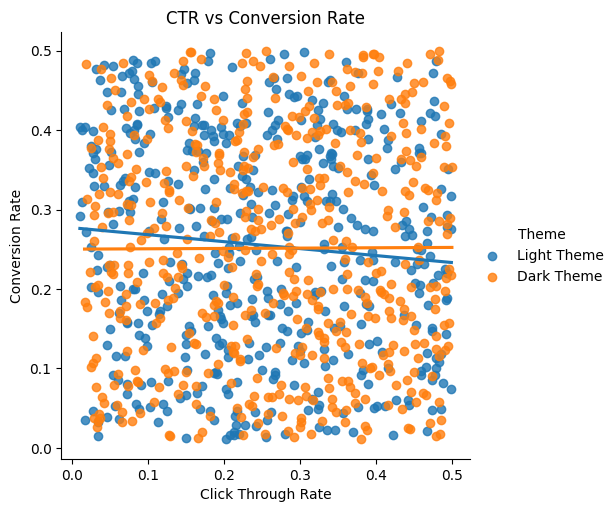

In [13]:
# Création du graphique scatter avec régressions linéaires pour chaque catégorie
plt.figure(figsize=(14, 7))
sns.lmplot(data=data, x='Click Through Rate', y='Conversion Rate', hue='Theme', ci=None)

# Ajout de titres et labels
plt.title('CTR vs Conversion Rate')
plt.xlabel('Click Through Rate')
plt.ylabel('Conversion Rate')

# Affichage du graphique
plt.show()

> La relation entre le **taux de clics (CTR)** et **le taux de conversion** est cohérente et reste presque `inchangée`, comme le montre le nuage de points. Cela signifie que lorsque davantage d'utilisateurs cliquent sur des liens ou des boutons (augmentation du CTR), une proportion similaire d'entre eux finit également par s'inscrire quotidiennement (le taux de conversion reste stable). En d'autres termes, le pourcentage d'utilisateurs qui prennent l'action souhaitée de s'inscrire reste globalement le même, quel que soit le nombre d'utilisateurs ayant initialement cliqué sur des liens ou des boutons pour explorer le site.

> Voyons maintenant l'histogramme du CTR pour les deux thèmes :

La Visualisation en Plotly :

In [16]:
# Extract data for each theme
light_theme_data = data[data['Theme'] == 'Light Theme']
dark_theme_data = data[data['Theme'] == 'Dark Theme']

# Create grouped bar chart for Click Through Rate
fig = go.Figure()

fig.add_trace(go.Histogram(x=light_theme_data['Click Through Rate'], name='Light Theme', opacity=0.6))
fig.add_trace(go.Histogram(x=dark_theme_data['Click Through Rate'], name='Dark Theme', opacity=0.6))

fig.update_layout(
    title_text='Click Through Rate by Theme',
    xaxis_title_text='Click Through Rate',
    yaxis_title_text='Frequency',
    barmode='group',
    bargap=0.1
)

fig.show()

La Visualisation En Seaborn

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


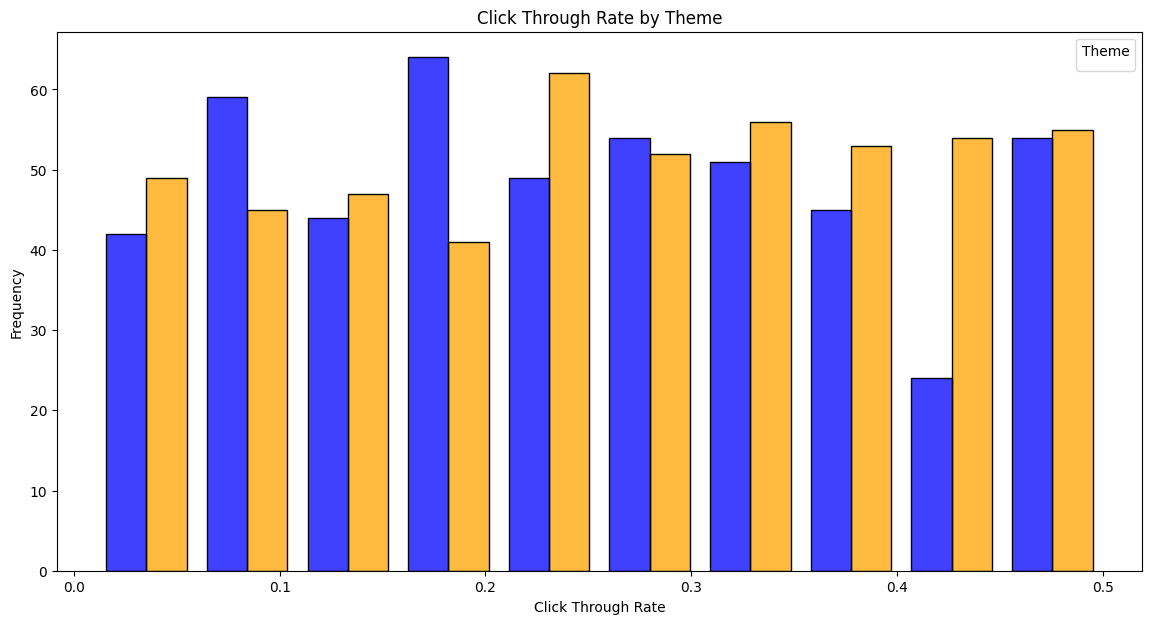

In [19]:
# Ajustement de la taille de la figure
plt.figure(figsize=(14, 7))
# Création de l'histogramme groupé sans superposition
sns.histplot(data=data, x='Click Through Rate', hue='Theme', multiple='dodge', shrink=0.8, bins=10, palette=['blue', 'orange'])

# Personnalisation du graphique
plt.title('Click Through Rate by Theme')
plt.xlabel('Click Through Rate')
plt.ylabel('Frequency')
plt.legend(title='Theme')

# Affichage du graphique
plt.show()

Dans l'histogramme ci-dessus, on observe qu'il n'y a pas de grande différence dans la performance des deux thèmes. Jetons maintenant un coup d'œil à l'histogramme des taux de conversion pour les deux thèmes :

La Visualisation En Plotly

In [20]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=light_theme_data['Conversion Rate'], 
                           name='Light Theme', opacity=0.6, nbinsx=20))
fig.add_trace(go.Histogram(x=dark_theme_data['Conversion Rate'], 
                           name='Dark Theme', opacity=0.6, nbinsx=20))

fig.update_layout(
    title_text='Conversion Rate by Theme',
    xaxis_title_text='Conversion Rate',
    yaxis_title_text='Frequency',
    barmode='group',
    bargap=0.1
)

fig.show()

La Visualisation En Seaborn

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


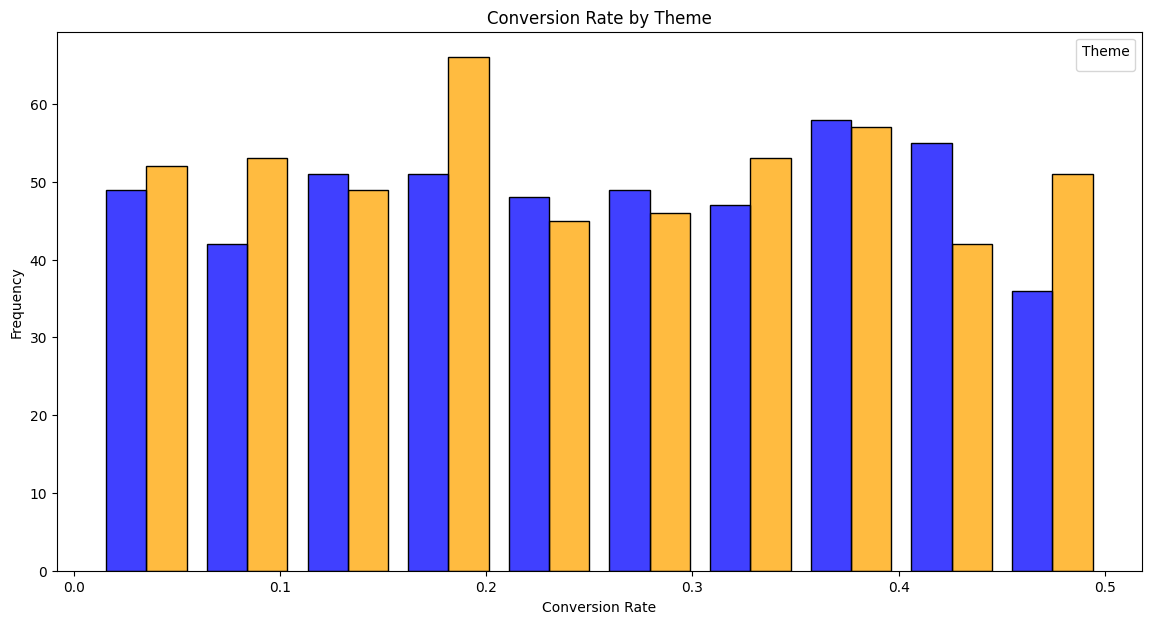

In [21]:
# Ajustement de la taille de la figure
plt.figure(figsize=(14, 7))
# Création de l'histogramme groupé sans superposition
sns.histplot(data=data, x='Conversion Rate', hue='Theme', multiple='dodge', shrink=0.8, bins=10, palette=['blue', 'orange'])

# Personnalisation du graphique
plt.title('Conversion Rate by Theme')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.legend(title='Theme')

# Affichage du graphique
plt.show()

> Bien qu'il n'y ait pas une grande différence, le taux de conversion du thème sombre est légèrement meilleur que celui du thème clair. Voyons maintenant la distribution des taux de rebond pour les deux thèmes :

La Visualisation En Seaborn

In [22]:
fig = go.Figure()
fig.add_trace(go.Box(y=light_theme_data['Bounce Rate'], 
                     name='Light Theme'))
fig.add_trace(go.Box(y=dark_theme_data['Bounce Rate'], 
                     name='Dark Theme'))

fig.update_layout(
    title_text='Bounce Rate by Theme',
    yaxis_title_text='Bounce Rate',
)

fig.show()

La Visualisation En Seaborn

C:\Users\i.elfourati\AppData\Local\Temp\ipykernel_16000\3660129200.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




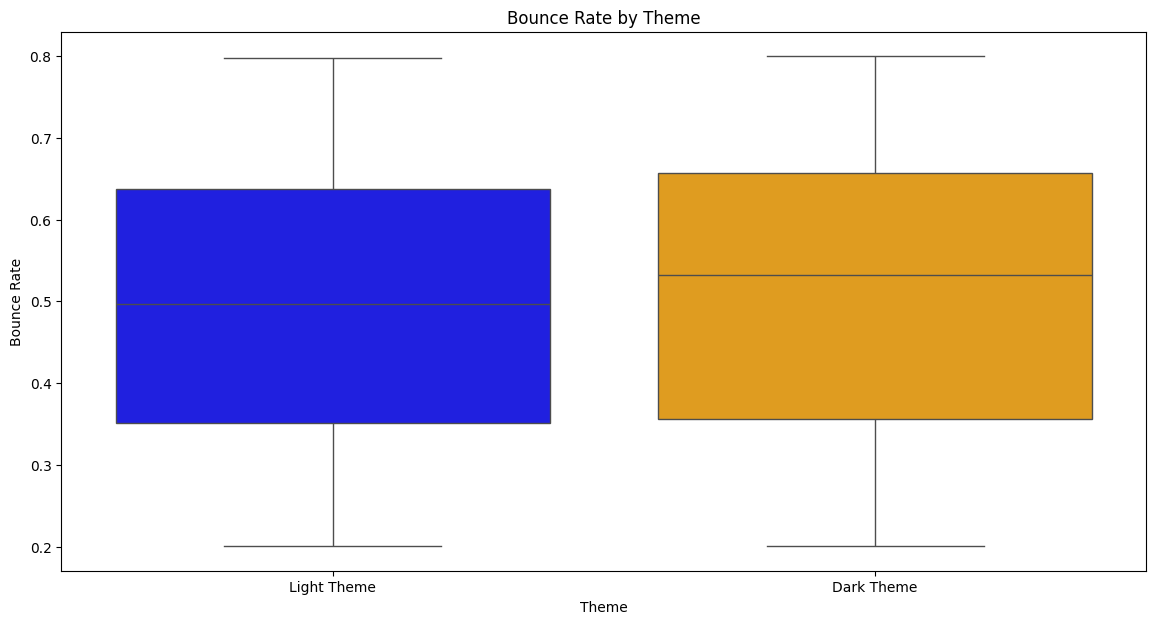

In [23]:
# Ajustement de la taille de la figure
plt.figure(figsize=(14, 7))

# Création de la boîte à moustaches groupée
sns.boxplot(data=data, y='Bounce Rate', x='Theme', palette=['blue', 'orange'])

# Personnalisation du graphique
plt.title('Bounce Rate by Theme')
plt.ylabel('Bounce Rate')

# Affichage du graphique
plt.show()

La Visualisation En Plotly

In [24]:
fig = go.Figure()
fig.add_trace(go.Box(y=light_theme_data['Scroll_Depth'], 
                     name='Light Theme'))
fig.add_trace(go.Box(y=dark_theme_data['Scroll_Depth'], 
                     name='Dark Theme'))

fig.update_layout(
    title_text='Scroll Depth by Theme',
    yaxis_title_text='Scroll Depth',
)

fig.show()

La Visualisation En Seaborn

C:\Users\i.elfourati\AppData\Local\Temp\ipykernel_16000\1699053287.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




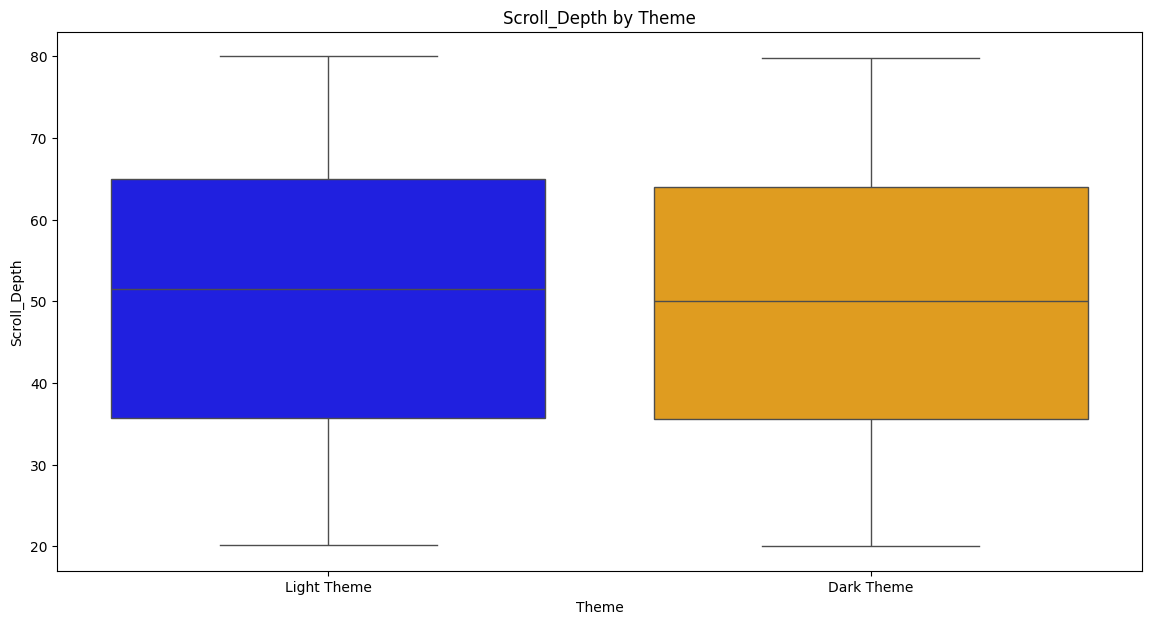

In [25]:
# Ajustement de la taille de la figure
plt.figure(figsize=(14, 7))

# Création de la boîte à moustaches groupée
sns.boxplot(data=data, y='Scroll_Depth', x='Theme', palette=['blue', 'orange'])

# Personnalisation du graphique
plt.title('Scroll_Depth by Theme')
plt.ylabel('Scroll_Depth')

# Affichage du graphique
plt.show()

> Il n’y a pas une grande différence, mais la profondeur de défilement du thème clair est légèrement meilleure.

### Comparaison des deux thème en fonction des achats

> Je vais maintenant effectuer un test de performance à deux échantillons pour comparer les achats réalisés avec les deux thèmes :

In [26]:
# A/B testing for Purchases
light_theme_conversions = light_theme_data[light_theme_data['Purchases'] == 'Yes'].shape[0]
light_theme_total = light_theme_data.shape[0]

dark_theme_conversions = dark_theme_data[dark_theme_data['Purchases'] == 'Yes'].shape[0]
dark_theme_total = dark_theme_data.shape[0]

conversion_counts = [light_theme_conversions, dark_theme_conversions]
sample_sizes = [light_theme_total, dark_theme_total]

light_theme_conversion_rate = light_theme_conversions / light_theme_total
dark_theme_conversion_rate = dark_theme_conversions / dark_theme_total

# Perform two-sample proportion test
zstat, pval = proportions_ztest(conversion_counts, sample_sizes)
print("Light Theme Conversion Rate:", light_theme_conversion_rate)
print("Dark Theme Conversion Rate:", dark_theme_conversion_rate)
print("A/B Testing - z-statistic:", zstat, " p-value:", pval)

Light Theme Conversion Rate: 0.5308641975308642
Dark Theme Conversion Rate: 0.5038910505836576
A/B Testing - z-statistic: 0.8531246206222649  p-value: 0.39359019934127804


<h4>🧪 Résultats du Test A/B sur les Taux de Conversion</h4>

**Contexte**

Dans le cadre de notre comparaison des taux de conversion basés sur les achats pour les deux thèmes (clair et sombre), nous avons effectué un test A/B pour déterminer s’il existe une différence statistiquement significative entre les taux de conversion des deux thèmes.

**📊 Résultats du Test A/B**

- `z-statistique` : 0.8531

- `p-value :` 0.3936

**📈 Interprétation des Résultats**

- La `z-statistique` mesure la différence entre les taux de conversion des deux thèmes en termes d’écarts-types. Dans ce cas, la z-statistique de 0.8531 indique que le taux de conversion du thème clair est légèrement supérieur à celui du thème sombre.

- La `p-value` représente la probabilité d’observer cette différence, ou une différence plus extrême, si l’hypothèse nulle est vraie. Avec une p-value de 0.3936, bien au-dessus du seuil de signification de 0.05, nous n’avons pas suffisamment de preuves pour rejeter l’hypothèse nulle.

**🎯 Conclusion**

Puisque la p-value est supérieure à 0.05, cela signifie que la différence observée entre les deux thèmes n’est pas statistiquement significative. En d’autres termes, il est probable que les variations observées soient dues au hasard plutôt qu’à une véritable différence causée par les thèmes.

👉 D’après les données actuelles, nous *ne pouvons donc pas affirmer de manière convaincante qu’un thème conduit à davantage d’achats que l’autre*.

### ⏱️ Comparaison des Thèmes Basée sur la Durée des Sessions

La **durée des sessions** est également un indicateur important pour évaluer combien de temps les utilisateurs aiment rester sur votre site web. Pour comparer la durée des sessions entre les deux thèmes, nous allons réaliser un test t à deux échantillons.

**🧪 Prochaines Étapes**

Je vais maintenant procéder à ce test afin de comparer la durée des sessions pour les deux thèmes :

In [27]:
light_theme_session_duration = light_theme_data['Session_Duration']
dark_theme_session_duration = dark_theme_data['Session_Duration']

# Calculate the average session duration for both themes
light_theme_avg_duration = light_theme_session_duration.mean()
dark_theme_avg_duration = dark_theme_session_duration.mean()

# Print the average session duration for both themes
print("Light Theme Average Session Duration:", light_theme_avg_duration)
print("Dark Theme Average Session Duration:", dark_theme_avg_duration)

# Perform two-sample t-test for session duration
tstat, pval = stats.ttest_ind(light_theme_session_duration, dark_theme_session_duration)
print("A/B Testing for Session Duration - t-statistic:", tstat, " p-value:", pval)

Light Theme Average Session Duration: 930.8333333333334
Dark Theme Average Session Duration: 919.4824902723735
A/B Testing for Session Duration - t-statistic: 0.3528382474155483  p-value: 0.7242842138292167


Pour évaluer s'il existe une différence statistiquement significative dans la durée moyenne des sessions entre les deux thèmes, nous avons réalisé un test A/B. Voici les résultats :

**📊 Résultats du Test A/B**

- `t-statistique :` 0.3528
- `p-value :` 0.7243

**🔍 Interprétation des Résultats**

- `t-statistique :` La t-statistique mesure la différence dans la durée moyenne des sessions entre les deux thèmes, en tenant compte de la variabilité au sein des ensembles de données. Ici, la t-statistique est d'environ 0.3528. Une valeur positive indique que la durée moyenne des sessions du thème clair est légèrement supérieure à celle du thème sombre.

- `p-value :` La p-value représente la probabilité d’observer la différence constatée dans la durée moyenne des sessions, ou une différence plus extrême, si l’hypothèse nulle est vraie. Avec une p-value de 0.7243, bien au-dessus du seuil de signification typique de 0.05, nous n’avons pas suffisamment de preuves pour rejeter l’hypothèse nulle.

**🎯 Conclusion**

Étant donné que la p-value est largement supérieure à 0.05, cela signifie que la différence observée dans la durée moyenne des sessions entre les deux thèmes n’est pas statistiquement significative. Les résultats suggèrent que toute différence constatée dans la durée des sessions pourrait être due à une variation aléatoire plutôt qu'à une véritable différence causée par les thèmes.

En d'autres termes, *les résultats indiquent que la durée moyenne des sessions pour les deux thèmes est similaire et que les différences observées pourraient être dues au hasard*.

### 📋 Résumé

Voici comment réaliser un test A/B de thèmes ou de designs en utilisant Python. Le test A/B est une technique puissante et largement utilisée pour comparer et évaluer des stratégies marketing, des designs, des agencements ou des thèmes. Son objectif principal est de prendre des décisions basées sur des données, afin d’améliorer l’expérience utilisateur, d'optimiser les indicateurs de performance et, en fin de compte, d’obtenir de meilleurs résultats commerciaux.

J'espère que ce notebook sur le test A/B de thèmes avec Python vous a été utile.